In [68]:
import pickle
import os
import pandas as pd
import pyarrow
import pyarrow.parquet as pa

from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import pdist, squareform
import numpy as np
import math

In [69]:
# Read in user history, i.e. dictionary containing all histories per user {<user_id>: {<article_id>, ...}}
user_history_path = "../DATA/user_history_selection/histories_pickle.txt"
user_history = pickle.load(open(user_history_path, 'rb'))

In [70]:
K = 5
res = dict(list(user_history.items())[0: K])
print(res)

{'2444624': {'9750358', '9741083', '9769580', '9752244', '9739864', '9745524', '9745698', '9744216', '9685790', '9745613', '9761862', '9761788', '9767975', '9743831', '9748574', '9737521', '9744213', '9754133', '9751564', '9756441', '9753995', '9764642', '9755849', '9765156', '9746558', '9762135', '9754025', '9740551', '9758328', '9749184', '9746482', '9744925', '9742049', '9746345', '9762836', '9770882', '9760170', '9756190', '9741176', '9745931', '9750696', '9753935', '9752788', '9759951', '9749756', '9747796', '9748140', '9759142', '9740237', '9750726', '9757533', '9767071', '9744000', '9762341', '9755999', '9754915', '9740156', '9751411', '9740711', '9769994', '9745912', '9744479', '9745706', '9750815', '9749886', '9767507', '9740942', '9753949', '9474355', '9763880', '9753415', '9760998', '9747839', '9769367', '9744477', '9753168', '9746488', '9752984', '9756096', '9752824', '9768599', '9749857', '9760437', '9740249', '9747437', '9763188', '9761359', '9754000', '9748323', '9766919

In [71]:
print(pd. __version__)

2.2.2


In [72]:
user_articles_info_path = "../DATA/user_history_selection/small_user_articles_info_dict.txt"
user_articles_info = pickle.load(open(user_articles_info_path, 'rb'))

In [73]:
K = 5
res = dict(list(user_articles_info.items())[0: K])
print(res)

{'2444624': {'topics': [array(['Kendt', 'Sport', 'Katastrofe', 'Mindre ulykke'], dtype=object), array(['Kriminalitet', 'Politik', 'National politik'], dtype=object), array(['Begivenhed', 'Politik', 'International politik',
       'Konflikt og krig'], dtype=object), array(['Erhverv', 'Privat virksomhed', 'Økonomi'], dtype=object), array(['Kendt', 'Begivenhed', 'Sport', 'Ketcher- og batsport',
       'Sportsbegivenhed'], dtype=object), array(['Politik', 'International politik', 'Konflikt og krig',
       'Væbnet konflikt'], dtype=object), array(['Kendt', 'Begivenhed', 'Sport', 'Fodbold', 'Sportsbegivenhed'],
      dtype=object), array(['Erhverv', 'Privat virksomhed', 'Transportmiddel', 'Bil',
       'Økonomi'], dtype=object), array(['Kendt', 'Underholdning', 'Musik og lyd'], dtype=object), array(['Transportmiddel', 'Katastrofe', 'Mindre ulykke'], dtype=object), array(['Kriminalitet', 'Personfarlig kriminalitet'], dtype=object), array(['Kriminalitet', 'Transportmiddel', 'Katastrofe', 'Min

In [74]:
print(len(user_articles_info))

19704


In [75]:
example_user_id = '2444624'
print(user_articles_info[example_user_id])

{'topics': [array(['Kendt', 'Sport', 'Katastrofe', 'Mindre ulykke'], dtype=object), array(['Kriminalitet', 'Politik', 'National politik'], dtype=object), array(['Begivenhed', 'Politik', 'International politik',
       'Konflikt og krig'], dtype=object), array(['Erhverv', 'Privat virksomhed', 'Økonomi'], dtype=object), array(['Kendt', 'Begivenhed', 'Sport', 'Ketcher- og batsport',
       'Sportsbegivenhed'], dtype=object), array(['Politik', 'International politik', 'Konflikt og krig',
       'Væbnet konflikt'], dtype=object), array(['Kendt', 'Begivenhed', 'Sport', 'Fodbold', 'Sportsbegivenhed'],
      dtype=object), array(['Erhverv', 'Privat virksomhed', 'Transportmiddel', 'Bil',
       'Økonomi'], dtype=object), array(['Kendt', 'Underholdning', 'Musik og lyd'], dtype=object), array(['Transportmiddel', 'Katastrofe', 'Mindre ulykke'], dtype=object), array(['Kriminalitet', 'Personfarlig kriminalitet'], dtype=object), array(['Kriminalitet', 'Transportmiddel', 'Katastrofe', 'Mindre ulykke',

In [76]:
# Sample data
data = user_articles_info[example_user_id]

# Convert to DataFrame
df = pd.DataFrame(data)

display(df)

display(df.isnull().sum()) 

,topics,sentiment,page_views,time_published
0,"[Kendt, Sport, Katastrofe, Mindre ulykke]",0.9927,72238.0,2023-05-02 09:26:32
1,"[Kriminalitet, Politik, National politik]",0.8951,100256.0,2023-05-11 22:06:14
2,"[Begivenhed, Politik, International politik, K...",0.9604,203863.0,2023-05-08 09:20:20
3,"[Erhverv, Privat virksomhed, Økonomi]",0.9496,90467.0,2023-05-03 06:35:01
4,"[Kendt, Begivenhed, Sport, Ketcher- og batspor...",0.9134,155259.0,2023-04-29 18:58:27
...,...,...,...,...
651,"[Kendt, Politik, International politik, Konfli...",0.6602,186450.0,2023-04-30 08:05:30
652,"[Kendt, Politik, International politik, Konfli...",0.6481,162297.0,2023-05-17 02:51:22
653,"[Kendt, Livsstil, Underholdning, Partnerskab]",0.8849,189701.0,2023-04-23 20:26:47
654,"[Erhverv, Privat virksomhed, Økonomi, Politik,...",0.5655,46261.0,2023-05-10 09:07:44


topics             0
sentiment          0
page_views        15
time_published     0
dtype: int64

In [77]:
df = df.dropna(how='any')
display(df.isnull().sum()) 

topics            0
sentiment         0
page_views        0
time_published    0
dtype: int64

In [110]:
from collections import defaultdict, OrderedDict

# Dictionary containing al the relevant clustered articles per user
user_clustered_articles = defaultdict(lambda: OrderedDict())

/tmp/ipykernel_67235/2933138509.py:37: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(gower_dist_matrix, method='ward')


[129.95068491 129.95068491 129.95068491 ... 129.95068491  47.86884318
 129.95068491]
198
197


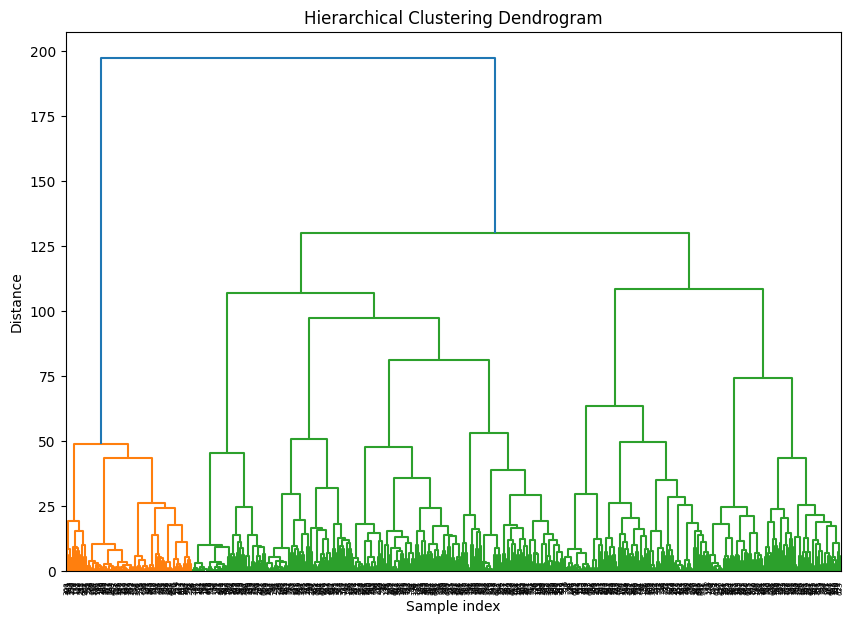

,topics,sentiment,page_views,time_published,hour,cluster
0,"[Kendt, Sport, Katastrofe, Mindre ulykke]",0.9927,72238.0,2023-05-02 09:26:32,9,2
1,"[Kriminalitet, Politik, National politik]",0.8951,100256.0,2023-05-11 22:06:14,22,2
2,"[Begivenhed, Politik, International politik, K...",0.9604,203863.0,2023-05-08 09:20:20,9,2
3,"[Erhverv, Privat virksomhed, Økonomi]",0.9496,90467.0,2023-05-03 06:35:01,6,2
4,"[Kendt, Begivenhed, Sport, Ketcher- og batspor...",0.9134,155259.0,2023-04-29 18:58:27,18,1
...,...,...,...,...,...,...
651,"[Kendt, Politik, International politik, Konfli...",0.6602,186450.0,2023-04-30 08:05:30,8,2
652,"[Kendt, Politik, International politik, Konfli...",0.6481,162297.0,2023-05-17 02:51:22,2,2
653,"[Kendt, Livsstil, Underholdning, Partnerskab]",0.8849,189701.0,2023-04-23 20:26:47,20,2
654,"[Erhverv, Privat virksomhed, Økonomi, Politik,...",0.5655,46261.0,2023-05-10 09:07:44,9,2


In [78]:
# Multi-Label Binarizer for 'topics'
mlb = MultiLabelBinarizer()
topics_encoded = mlb.fit_transform(df['topics'])

# Normalize 'page_views'
scaler = MinMaxScaler()
page_views_normalized = scaler.fit_transform(df[['page_views']])

# Convert 'time_published' to datetime and extract the hour
df['time_published'] = pd.to_datetime(df['time_published'], unit='s')
df['hour'] = df['time_published'].dt.hour

# Normalize the hour (0-23) to be between 0 and 1
hour_normalized = df['hour'] / 23.0
hour_normalized = hour_normalized.values.reshape(-1, 1)

# Combine all features
features = np.hstack((topics_encoded, df[['sentiment']].values, page_views_normalized, hour_normalized))

# Define a function to calculate Gower distance
def gower_distance(X):
    individual_variable_distances = []
    for col in range(X.shape[1]):
        if np.issubdtype(X[:, col].dtype, np.number):
            range_ = np.ptp(X[:, col])
            if range_ == 0:
                range_ = 1  # avoid division by zero
            individual_variable_distances.append(pdist(X[:, col].reshape(-1, 1), metric='euclidean') / range_)
        else:
            individual_variable_distances.append(pdist(X[:, col].reshape(-1, 1), metric='hamming'))
    return np.sqrt(sum(individual_variable_distances))

# Calculate Gower distance matrix
gower_dist_matrix = squareform(gower_distance(features))

# Perform hierarchical clustering
Z = linkage(gower_dist_matrix, method='ward')

# Calculate cophenetic distances
c, coph_dists = cophenet(Z, pdist(gower_dist_matrix))

print(coph_dists)
print(math.ceil(max(coph_dists)))
print(math.floor(max(coph_dists)))

# Plot the dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Determine cluster assignments
max_d = math.floor(max(coph_dists))  # set this value based on the dendrogram
clusters = fcluster(Z, max_d, criterion='distance')

df['cluster'] = clusters

display(df)

In [79]:
df.loc[df['cluster'].idxmax()]

topics            [Kendt, Sport, Katastrofe, Mindre ulykke]
sentiment                                            0.9927
page_views                                          72238.0
time_published                          2023-05-02 09:26:32
hour                                                      9
cluster                                                   2
Name: 0, dtype: object

In [80]:
df.loc[df['cluster'].idxmin()]

topics            [Kendt, Begivenhed, Sport, Ketcher- og batspor...
sentiment                                                    0.9134
page_views                                                 155259.0
time_published                                  2023-04-29 18:58:27
hour                                                             18
cluster                                                           1
Name: 4, dtype: object

In [108]:
# Get all possible clusters
clusters = df.cluster.unique()

print(clusters)

test_article_ids = {}

for c in clusters:
    print(c)
    # Get all articles belonging to cluster c
    clustered_articles = df.loc[df['cluster'] == c]
    # Sort articles history by most recent publishing date
    ca_history = clustered_articles.sort_values(by='time_published', ascending = False)
    display(ca_history)
    article_id_indices = list(ca_history.index)
    print(article_id_indices)
    # For each article in the history save the <article_id> as a key and the <time_published> as value
    for idx in article_id_indices
        article_id = test_article_ids[idx]
        user_clustered_articles[user_id][article_id] = df.loc[[idx],['time_published']]
    


[2 1]
2


,topics,sentiment,page_views,time_published,hour,cluster
597,"[Politik, International politik, Konflikt og k...",0.8683,104202.0,2023-05-18 04:37:32,4,2
25,"[Samfund, Bæredygtighed og klima, Politik, Int...",0.9648,76626.0,2023-05-17 18:59:40,18,2
198,"[Kriminalitet, Kendt, Underholdning, Film og t...",0.6740,218657.0,2023-05-17 18:31:50,18,2
7,"[Erhverv, Privat virksomhed, Transportmiddel, ...",0.6745,174369.0,2023-05-17 18:31:40,18,2
52,"[Kriminalitet, Erhverv, Privat virksomhed]",0.9852,84937.0,2023-05-17 17:57:43,17,2
...,...,...,...,...,...,...
382,"[Kendt, Underholdning, Bolig, Køb og salg]",0.5908,57560.0,2023-04-27 07:05:57,7,2
519,"[Livsstil, Kultur, Mad og drikke]",0.4987,19119.0,2023-04-24 06:29:00,6,2
653,"[Kendt, Livsstil, Underholdning, Partnerskab]",0.8849,189701.0,2023-04-23 20:26:47,20,2
266,[Livsstil],0.5088,24801.0,2023-04-21 20:00:00,20,2


[597, 25, 198, 7, 52, 199, 378, 280, 149, 466, 221, 555, 645, 511, 400, 610, 176, 569, 467, 454, 321, 394, 652, 619, 190, 248, 521, 343, 76, 387, 510, 324, 415, 385, 308, 487, 434, 16, 390, 593, 58, 320, 638, 148, 617, 186, 224, 329, 85, 319, 637, 142, 33, 10, 558, 580, 416, 208, 600, 481, 151, 318, 164, 39, 572, 551, 495, 546, 620, 573, 453, 189, 18, 50, 153, 618, 417, 197, 227, 640, 504, 352, 167, 22, 268, 184, 627, 353, 122, 395, 550, 12, 393, 526, 364, 623, 561, 263, 581, 234, 255, 474, 565, 326, 182, 609, 537, 67, 292, 265, 109, 430, 477, 279, 369, 484, 183, 549, 194, 218, 615, 209, 178, 362, 531, 86, 271, 19, 77, 337, 232, 497, 589, 396, 73, 191, 40, 90, 397, 357, 92, 5, 1, 381, 328, 370, 155, 172, 137, 63, 459, 144, 559, 404, 389, 88, 452, 133, 287, 131, 398, 626, 373, 24, 540, 317, 270, 611, 45, 30, 225, 243, 529, 38, 654, 392, 344, 446, 478, 464, 119, 614, 402, 291, 500, 451, 210, 118, 566, 536, 123, 289, 188, 305, 97, 414, 348, 309, 588, 458, 300, 299, 407, 545, 483, 556, 530

,topics,sentiment,page_views,time_published,hour,cluster
512,"[Begivenhed, Sport, Fodbold, Sportsbegivenhed]",0.9022,36708.0,2023-05-17 18:40:31,18,1
437,"[Begivenhed, Sport, Sundhed, Sygdom og behandl...",0.9901,145766.0,2023-05-17 18:10:33,18,1
351,"[Kendt, Begivenhed, Sport, Sundhed, Sygdom og ...",0.5932,38398.0,2023-05-17 17:50:17,17,1
80,"[Begivenhed, Sport, Fodbold, Sportsbegivenhed]",0.6040,20640.0,2023-05-17 16:50:18,16,1
426,"[Kendt, Begivenhed, Sport, Ketcher- og batspor...",0.9794,96411.0,2023-05-17 16:07:56,16,1
...,...,...,...,...,...,...
502,"[Begivenhed, Sport, Fodbold, Sportsbegivenhed]",0.8149,40728.0,2023-04-28 09:10:55,9,1
169,"[Begivenhed, Sport, Fodbold, Sportsbegivenhed]",0.9614,27563.0,2023-04-28 08:11:30,8,1
215,"[Begivenhed, Sport, Fodbold, Sportsbegivenhed]",0.9002,20037.0,2023-04-27 16:28:29,16,1
252,"[Begivenhed, Sport, Ketcher- og batsport, Spor...",0.6283,31717.0,2023-04-27 11:21:48,11,1


[512, 437, 351, 80, 426, 44, 629, 156, 342, 492, 237, 235, 136, 195, 51, 126, 444, 368, 439, 423, 27, 304, 244, 139, 384, 563, 161, 433, 28, 32, 418, 338, 82, 15, 379, 616, 579, 468, 147, 463, 562, 376, 491, 642, 214, 116, 301, 281, 222, 145, 586, 325, 297, 13, 60, 313, 323, 591, 160, 103, 421, 269, 249, 473, 363, 315, 295, 251, 647, 605, 229, 485, 59, 557, 650, 331, 78, 21, 408, 409, 587, 150, 625, 475, 6, 538, 216, 377, 445, 624, 240, 4, 138, 552, 413, 20, 120, 391, 505, 72, 502, 169, 215, 252, 69]


/tmp/ipykernel_67235/214507966.py:48: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(gower_dist_matrix, method='ward')


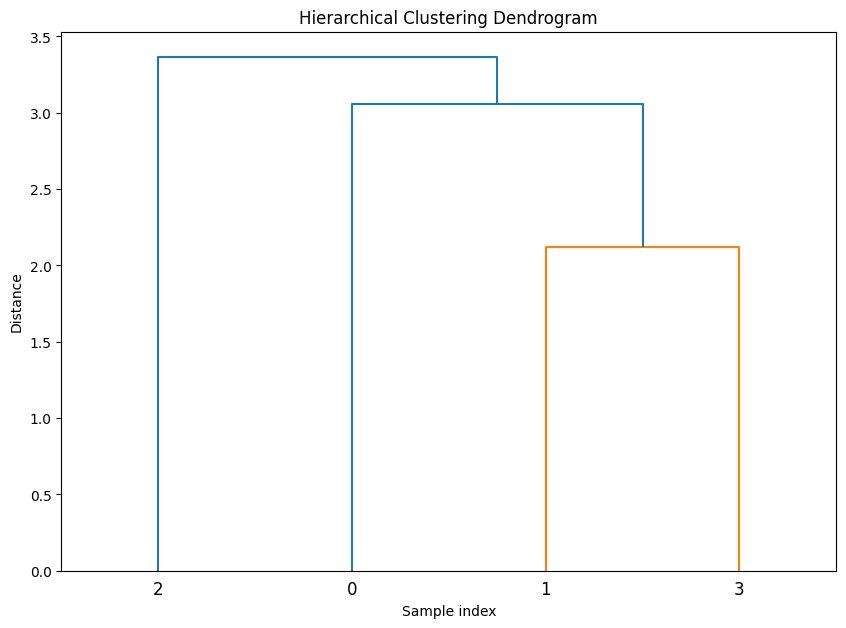

[3.0593191  3.36248139 3.0593191  3.36248139 2.12316322 3.36248139]
4
3
                topics  sentiment  page_views time_published  hour  cluster
0  [politics, economy]         -1         100     2021-01-01     0        2
1         [technology]          0         200     2021-01-02     0        1
2    [health, science]          1         300     2021-01-03     0        3
3             [sports]          0         150     2021-01-04     0        1


,topics,sentiment,page_views,time_published,hour,cluster
0,"[politics, economy]",-1,100,2021-01-01,0,2
1,[technology],0,200,2021-01-02,0,1
2,"[health, science]",1,300,2021-01-03,0,3
3,[sports],0,150,2021-01-04,0,1


In [64]:
# Sample data
data = {
    'article_id': [1234, 13255, 223943, 221432],
    'topics': [['politics', 'economy'], ['technology'], ['health', 'science'], ['sports']],
    'sentiment': [-1, 0, 1, 0],
    'page_views': [100, 200, 300, 150],
    'time_published': [1609459200, 1609545600, 1609632000, 1609718400]  # Unix timestamps
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Multi-Label Binarizer for 'topics' 
mlb = MultiLabelBinarizer()
topics_encoded = mlb.fit_transform(df['topics'])

# Normalize 'page_views'
scaler = MinMaxScaler()
page_views_normalized = scaler.fit_transform(df[['page_views']])

# Convert 'time_published' to datetime and extract the hour
df['time_published'] = pd.to_datetime(df['time_published'], unit='s')
df['hour'] = df['time_published'].dt.hour

# Normalize the hour (0-23) to be between 0 and 1
hour_normalized = df['hour'] / 23.0
hour_normalized = hour_normalized.values.reshape(-1, 1)

# Combine all features
features = np.hstack((topics_encoded, df[['sentiment']].values, page_views_normalized, hour_normalized))

# Define a function to calculate Gower distance
def gower_distance(X):
    individual_variable_distances = []
    for col in range(X.shape[1]):
        if np.issubdtype(X[:, col].dtype, np.number):
            range_ = np.ptp(X[:, col])
            if range_ == 0:
                range_ = 1  # avoid division by zero
            individual_variable_distances.append(pdist(X[:, col].reshape(-1, 1), metric='euclidean') / range_)
        else:
            individual_variable_distances.append(pdist(X[:, col].reshape(-1, 1), metric='hamming'))
    return np.sqrt(sum(individual_variable_distances))

# Calculate Gower distance matrix
gower_dist_matrix = squareform(gower_distance(features))

# Perform hierarchical clustering
Z = linkage(gower_dist_matrix, method='ward')

# Plot the dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Calculate cophenetic distances
c, coph_dists = cophenet(Z, pdist(gower_dist_matrix))

print(coph_dists)
print(math.ceil(max(coph_dists)))
print(math.floor(max(coph_dists)))

# Determine cluster assignments
max_d = 3  # set this value based on the dendrogram
clusters = fcluster(Z, max_d, criterion='distance')

df['cluster'] = clusters

print(df)
display(df)